# Noise generator design

In [118]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [119]:
import numpy as np
import scipy
import scipy.ndimage
import sed3
import plotly.plotly as py

In [120]:
# [mm]
sample_spacing = [1.0, 1.0, 1.0]

# [mm]
lambda_start = 1.0
lambda_stop = 15.0

exponent = 0.0
data_shape = [100,100,100]

In [121]:
lambda0 = lambda_start * np.asarray(sample_spacing)
lambda1 = lambda_stop * np.asarray(sample_spacing)

In [122]:
def noise_normalization(data, std_factor=1.0):
    data0n = (data - np.mean(data)) * 1.0 / (std_factor * np.var(data)**0.5)
    return data0n

In [123]:
data = np.random.rand(*data_shape)

2.57074361798e-16
1.0


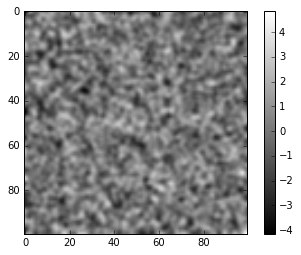

In [124]:

data0 = scipy.ndimage.filters.gaussian_filter(data, sigma=lambda0)
data0 = noise_normalization(data0)
plt.imshow(data0[:,:,50], cmap="gray")
plt.colorbar()
print np.mean(data0)
print np.var(data0)


(array([  1.00000000e+01,   2.40000000e+01,   1.56000000e+02,
          7.39000000e+02,   3.29500000e+03,   1.30220000e+04,
          3.87130000e+04,   8.77970000e+04,   1.51783000e+05,
          1.99186000e+05,   2.00750000e+05,   1.55636000e+05,
          9.10270000e+04,   4.03930000e+04,   1.31710000e+04,
          3.46000000e+03,   6.37000000e+02,   1.64000000e+02,
          2.50000000e+01,   1.20000000e+01]),
 array([-5.27338817, -4.7471906 , -4.22099302, -3.69479545, -3.16859788,
        -2.6424003 , -2.11620273, -1.59000516, -1.06380758, -0.53761001,
        -0.01141244,  0.51478514,  1.04098271,  1.56718028,  2.09337786,
         2.61957543,  3.145773  ,  3.67197058,  4.19816815,  4.72436572,
         5.25056329]),
 <a list of 20 Patch objects>)

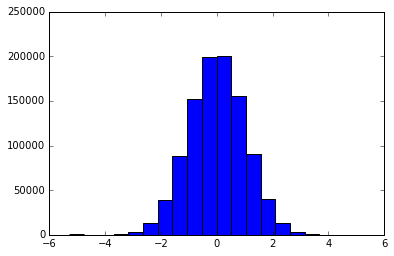

In [125]:
plt.hist(data0.ravel(), 20)

1.3304561719e-13
1.0


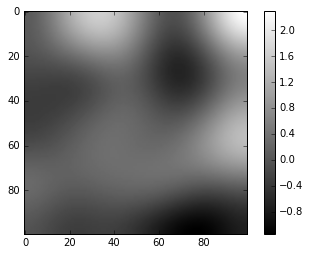

In [126]:

data1 = scipy.ndimage.filters.gaussian_filter(data, sigma=lambda1)
data1 = noise_normalization(data1)
plt.imshow(data1[:,:,50], cmap="gray")
plt.colorbar()
print np.mean(data1)
print np.var(data1)

(array([   1104.,    4565.,   42201.,  192650.,  333620.,  297564.,
          97856.,   23888.,    4807.,    1745.]),
 array([-4.28640401, -3.39345973, -2.50051545, -1.60757117, -0.71462689,
         0.17831739,  1.07126167,  1.96420595,  2.85715023,  3.7500945 ,
         4.64303878]),
 <a list of 10 Patch objects>)

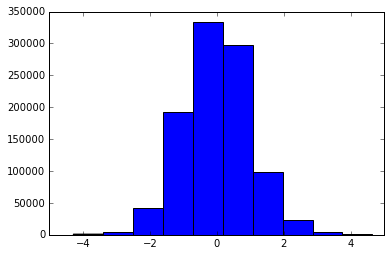

In [127]:

plt.hist(data1.ravel())

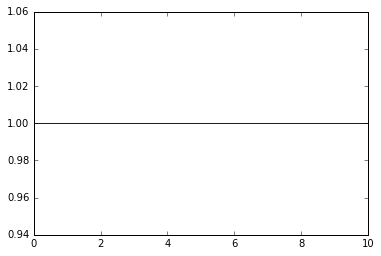

In [128]:
x = np.linspace(0,10)
y = np.exp(-0.0 * x)
plt.plot(x,y)

In [129]:

w0 = np.exp(exponent * lambda_start)
w1 = np.exp(exponent * lambda_stop)
wsum = w0 + w1
w0 = w0 / wsum
w1 = w1 / wsum
print w0, w1

0.5 0.5


6.66328219268e-14
0.528346224359


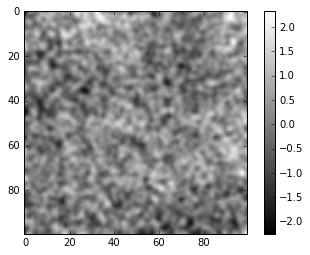

In [130]:

data = ( data0 * w0 + 
         data1 * w1)
plt.imshow(data[:,:,50], cmap="gray")
plt.colorbar()
print np.mean(data)
print np.var(data)

(array([  8.00000000e+00,   6.30000000e+01,   3.28000000e+02,
          1.42900000e+03,   6.58900000e+03,   2.71350000e+04,
          8.10090000e+04,   1.66180000e+05,   2.34611000e+05,
          2.29322000e+05,   1.51185000e+05,   6.91040000e+04,
          2.38250000e+04,   6.68200000e+03,   1.77200000e+03,
          5.65000000e+02,   1.54000000e+02,   3.30000000e+01,
          4.00000000e+00,   2.00000000e+00]),
 array([-3.93513174, -3.49488151, -3.05463129, -2.61438107, -2.17413085,
        -1.73388063, -1.29363041, -0.85338019, -0.41312997,  0.02712025,
         0.46737047,  0.90762069,  1.34787092,  1.78812114,  2.22837136,
         2.66862158,  3.1088718 ,  3.54912202,  3.98937224,  4.42962246,
         4.86987268]),
 <a list of 20 Patch objects>)

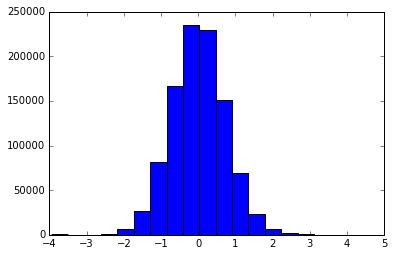

In [131]:

plt.hist(data.ravel(), 20)

In [132]:
def noises_fast(shape, sample_spacing=None, exponent=0.0, 
                lambda_start=0, lambda_stop=1, **kwargs):
    
    data0 = 0
    data1 = 0
    w0 = 0
    w1 = 0
    
    lambda1 = lambda_stop * np.asarray(sample_spacing)
    
    if lambda_start is not None:
        lambda0 = lambda_start * np.asarray(sample_spacing)
        data0 = np.random.rand(*shape)
        data0 = scipy.ndimage.filters.gaussian_filter(data0, sigma=lambda0)
        data0 = noise_normalization(data0)
        w0 = np.exp(exponent * lambda_start)
        
    if lambda_stop is not None:
        lambda1 = lambda_stop * np.asarray(sample_spacing)
        data1 = np.random.rand(*shape)
        data1 = scipy.ndimage.filters.gaussian_filter(data1, sigma=lambda1)
        data1 = noise_normalization(data1)
        w1 = np.exp(exponent * lambda_stop)
    
    wsum = w0 + w1
    if wsum > 0:
        w0 = w0 / wsum
        w1 = w1 / wsum
        
    print w0, w1
    print np.mean(data0), np.var(data0)
    print np.mean(data1), np.var(data1)
    
    data = ( data0 * w0 +  data1 * w1)
    
    # plt.figure()
    # plt.imshow(data0[:,:,50], cmap="gray")
    # plt.colorbar()
    # plt.figure()
    # plt.imshow(data1[:,:,50], cmap="gray")
    # plt.colorbar()
    return data


0.5 0.5
6.20445916866e-16 1.0
-1.22386154544e-14 1.0
var  0.494328133612
mean  -5.79871084483e-15


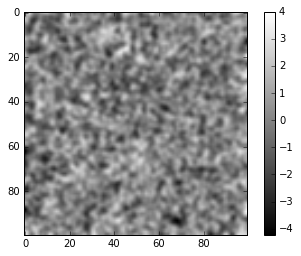

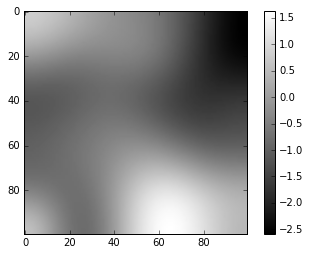

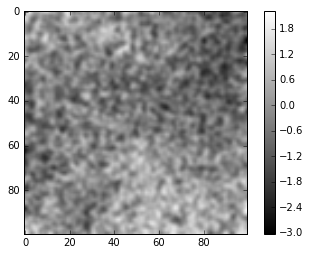

In [133]:
noise = noises_fast(
    shape=data_shape, 
    sample_spacing=sample_spacing, 
    exponent=exponent, 
    lambda_start=lambda_start,
    lambda_stop=lambda_stop
)

plt.figure()
plt.imshow(noise[:,:,50], cmap="gray")
plt.colorbar()
print "var ", np.var(noise.ravel())
print "mean ", np.mean(noise.ravel())